In [ ]:
# Import libraries
!pip install catboost

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib

# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
# Load the data
fatigue_df = pd.read_csv('../Data/Carbon_Bending_PI.csv')
fatigue_df

# Removing rows with null values
fatigue_df = fatigue_df.dropna()

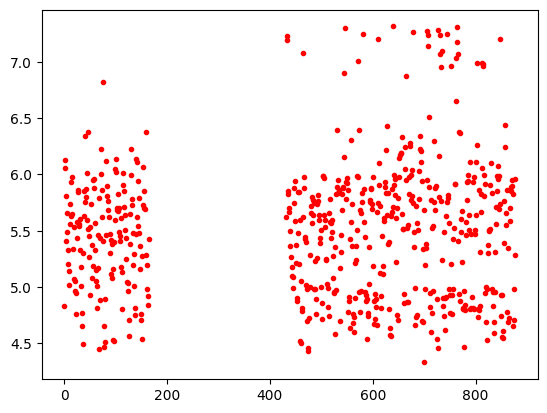

In [ ]:
# Scatter Plot
plt.plot(np.log10(fatigue_df['Number of Cycles']), 'r.')

# Sort the data by ascending order of number of cycles
fatigue_df.sort_values(by=['Number of Cycles'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
fatigue_df.columns

Index(['Heat', 'Stress (Mpa)', 'Number of Cycles', 'Temperature (°C)',
       'Reduction Ratio', 'dA', 'dB', 'dC', 'Frequency', 'Elongation',
       'Reduction of Area', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu',
       'Dataset', 'PI Fatigue Life'],
      dtype='object')

In [ ]:
drop_cols = ['Heat','Number of Cycles','Dataset'] # list the columns to drop along with target for independent feautures

# Use all remaining columns as features
features = fatigue_df.drop(drop_cols, axis=1)

# Use log transform of the number of cycles as targets
targets = np.log10(fatigue_df['Number of Cycles'])

# Display the features
features

,Stress (Mpa),Temperature (°C),Reduction Ratio,dA,dB,dC,Frequency,Elongation,Reduction of Area,C,Si,Mn,P,S,Ni,Cr,Cu,PI Fatigue Life
0,460,650,1270,0.04,0.01,0.00,50.0,29,70,0.42,0.26,0.70,0.024,0.010,0.01,0.01,0.01,2.485278e+04
1,500,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03,1.760709e+04
2,470,550,825,0.08,0.00,0.00,50.0,22,68,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02,2.601282e+04
3,580,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01,1.366745e+04
4,480,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03,4.867573e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,520,550,1270,0.08,0.01,0.00,50.0,19,58,0.54,0.26,0.76,0.022,0.021,0.02,0.12,0.01,1.027129e+07
607,480,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01,6.859817e+06
608,450,600,1740,0.07,0.00,0.00,50.0,22,64,0.45,0.25,0.79,0.018,0.016,0.02,0.13,0.13,1.484439e+07
609,530,550,610,0.08,0.00,0.04,50.0,16,50,0.54,0.27,0.70,0.017,0.020,0.06,0.10,0.22,1.304105e+07


In [ ]:
# Convert the features into floats
features = features.astype('float64')

In [ ]:
# Calculate the coverage percentage of values within a specified range
def coverage(y, yL, yH):
        return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

q: 0.025 | pearsonr: 0.815364648166848
q: 0.5 | pearsonr: 0.8559438677574032
q: 0.975 | pearsonr: 0.7114218171347289
Pearson CC: 0.8559438677574032
R2 score: 0.6737130468997914
RMSE: 0.3603689002513346
MAE: 0.21523515874785734
Coverage: 82.92682926829265
Upper coverage: 91.05691056910565
Lower coverage: 91.86991869918695
Average Interval Width: 1.061910577721513
Median Interval Width: 0.9825419203916272
Composite Metric: 0.8763932894244421


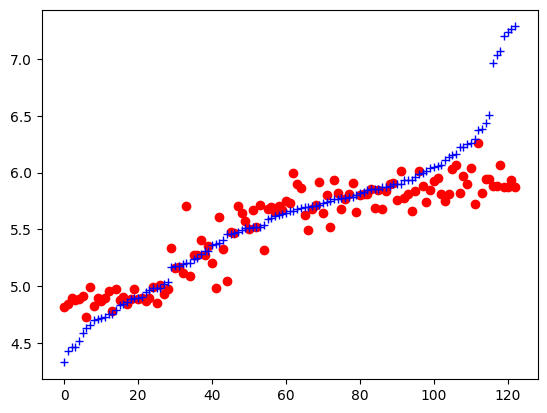

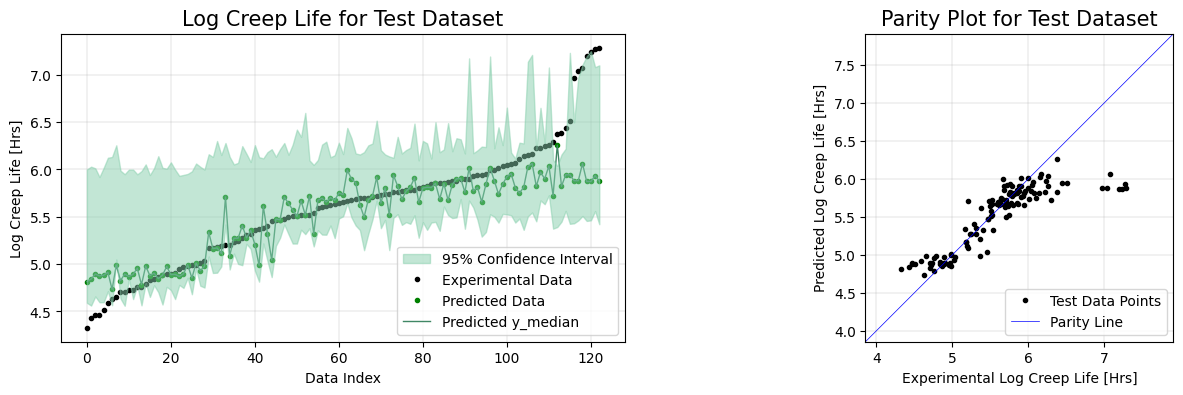

****************************************
q: 0.025 | pearsonr: 0.7199429344759405
q: 0.5 | pearsonr: 0.932655089218585
q: 0.975 | pearsonr: 0.729979986186727
Pearson CC: 0.932655089218585
R2 score: 0.8672937339414614
RMSE: 0.22087119598594349
MAE: 0.1559399213331423
Coverage: 91.80327868852463
Upper coverage: 94.26229508196725
Lower coverage: 97.54098360655742
Average Interval Width: 1.648617229188405
Median Interval Width: 1.6141770172584002
Composite Metric: 0.84340227540357


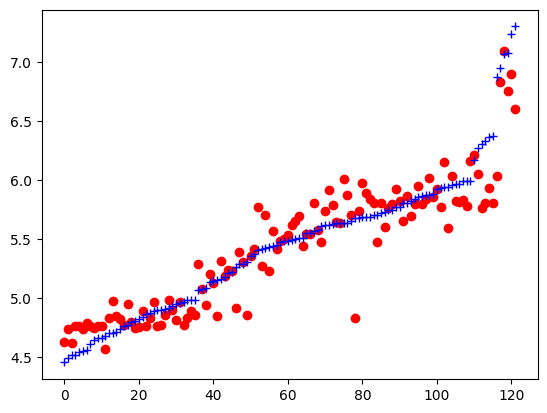

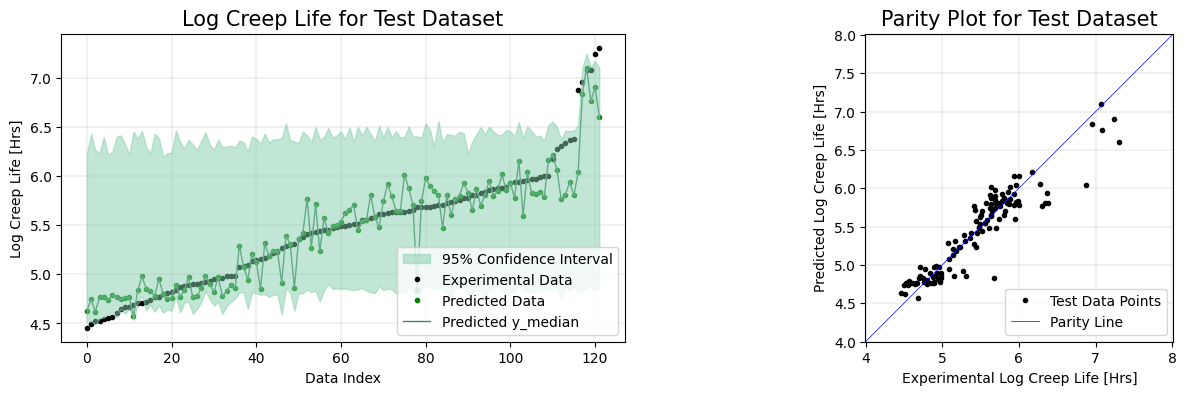

****************************************
q: 0.025 | pearsonr: 0.8196521387682065
q: 0.5 | pearsonr: 0.8789021001233019
q: 0.975 | pearsonr: 0.762016488972501
Pearson CC: 0.8789021001233019
R2 score: 0.7669757361397653
RMSE: 0.2850629845623687
MAE: 0.1891193749371846
Coverage: 84.42622950819676
Upper coverage: 88.52459016393446
Lower coverage: 95.90163934426234
Average Interval Width: 1.0844833775001317
Median Interval Width: 1.0156280172232939
Composite Metric: 0.8793498361925469


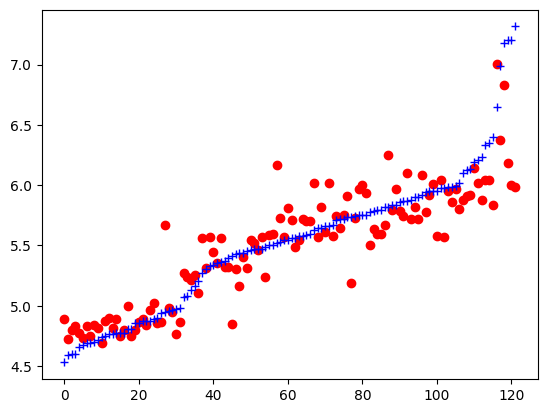

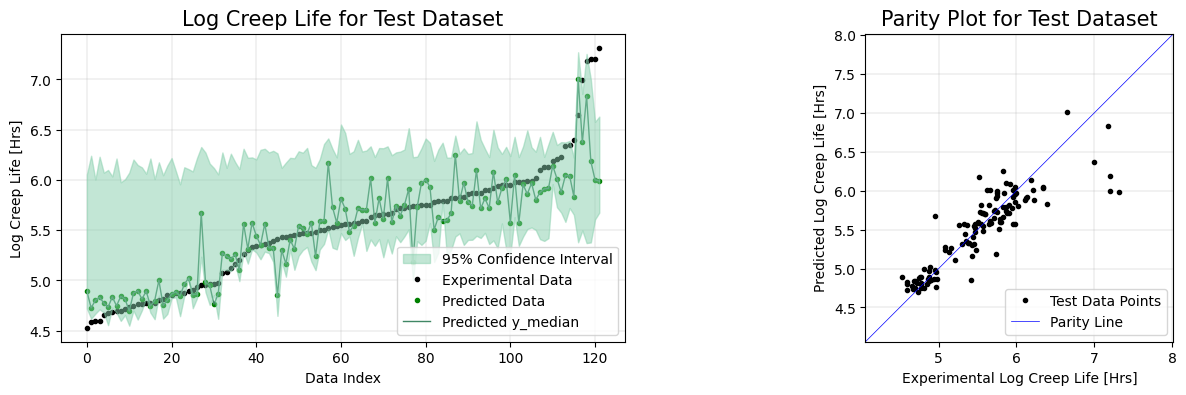

****************************************
q: 0.025 | pearsonr: 0.6829216939722746
q: 0.5 | pearsonr: 0.9026821688426779
q: 0.975 | pearsonr: 0.7552758597531609
Pearson CC: 0.9026821688426779
R2 score: 0.8139268405091459
RMSE: 0.23267054628469144
MAE: 0.1667912088545613
Coverage: 92.62295081967217
Upper coverage: 94.26229508196725
Lower coverage: 98.36065573770496
Average Interval Width: 1.5509111097694723
Median Interval Width: 1.5334394149034862
Composite Metric: 0.8577043302486287


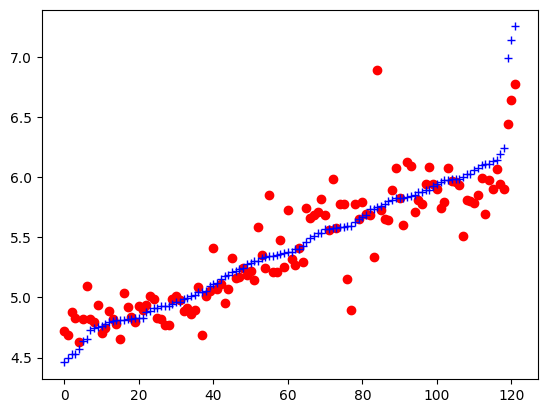

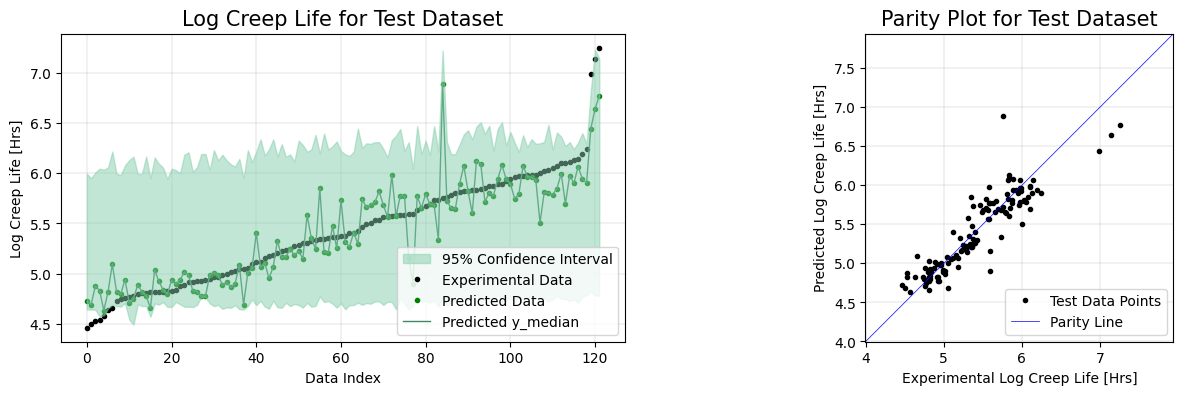

****************************************
q: 0.025 | pearsonr: 0.6489154142882329
q: 0.5 | pearsonr: 0.9188504252782775
q: 0.975 | pearsonr: 0.8058753141520191
Pearson CC: 0.9188504252782775
R2 score: 0.8323840668618685
RMSE: 0.26520076265815035
MAE: 0.17477779952904945
Coverage: 90.98360655737709
Upper coverage: 96.72131147540988
Lower coverage: 94.26229508196725
Average Interval Width: 1.6331482521690028
Median Interval Width: 1.5629507550241755
Composite Metric: 0.8423309051776229


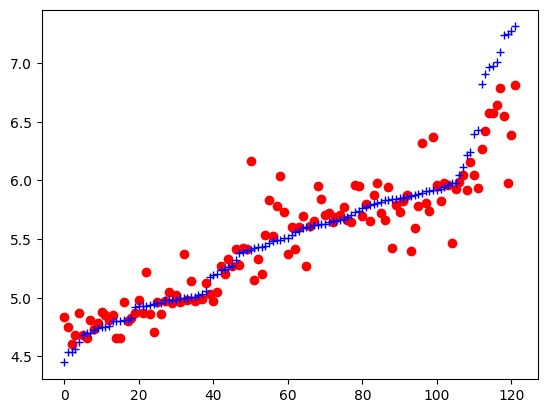

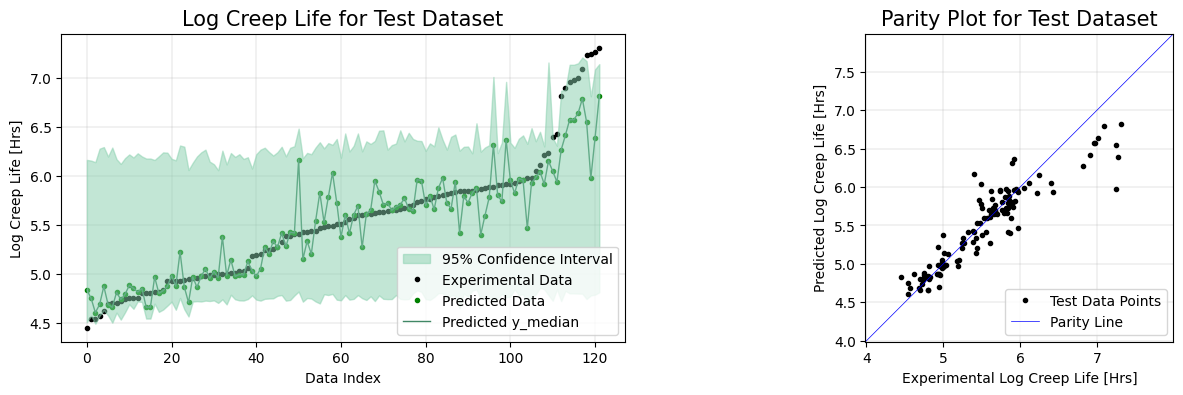

****************************************


In [ ]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

quantiles = [0.025, 0.5, 0.975]

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=66+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
                X_train, X_test = features.iloc[tr], features.iloc[ts]
                scale = StandardScaler()
                X_train = scale.fit_transform(X_train)
                X_test = scale.transform(X_test)
                y_train, y_test = targets.iloc[tr], targets.iloc[ts]
                X_train, X_val, y_train, y_val = train_test_split(
                        X_train, y_train, test_size=0.1)

                for q in quantiles:
                        parameters = {'loss_function': 'Quantile:alpha={:0.2f}'.format(q),
                                'num_boost_round': 5000}
                        model = CatBoostRegressor(**parameters)
                        model.fit(X_train, np.log(y_train),
                                eval_set=[(X_val, np.log(y_val))],
                                early_stopping_rounds=20,
                                verbose=False)
                        y_pred = np.exp(model.predict(X_test))
                        print(f'q: {q} | pearsonr: {pearsonr(y_test, y_pred)[0]}')
                        if q==0.025:
                           y_low = y_pred
                        elif q==0.5:
                                y_median = y_pred
                        elif q==0.975:
                               y_high = y_pred

                # Plot the predictions
                iteration_list = [i for i in range(len(y_test))]

                plt.plot(iteration_list, y_median, 'ro')
                plt.plot(iteration_list, y_test, 'b+')

                PearsonCC[j, i] = pearsonr(np.squeeze(y_test), np.squeeze(y_median))[0]
                R2_score[j, i] = r2_score(y_test, y_median)
                RMSE[j, i] = np.sqrt(mean_squared_error(y_test, y_median))
                MAE[j, i] = np.mean(abs(y_median-np.array(y_test)))

                print(f'Pearson CC: {PearsonCC[j, i]}')
                print(f'R2 score: {R2_score[j, i]}')
                print(f'RMSE: {RMSE[j, i]}')
                print(f'MAE: {MAE[j, i]}')

                test_coverage[j, i] = coverage(y_test, y_low, y_high)
                upper_coverage[j, i] = coverage(y_test, y_low, np.inf)
                lower_coverage[j, i] = coverage(y_test, -np.inf, y_high)

                print(f'Coverage: {test_coverage[j, i]}')
                print(f'Upper coverage: {upper_coverage[j, i]}')
                print(f'Lower coverage: {lower_coverage[j, i]}')


                # Prediction interval width
                mean_interval_width[j, i] = np.mean(y_high - y_low)
                print(f'Average Interval Width: {mean_interval_width[j, i]}')
                median_interval_width[j, i] = np.median(y_high - y_low)
                print(f'Median Interval Width: {median_interval_width[j, i]}')

                # Composite metric that combines the coverage and the invers of interval width
                composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
                print(f'Composite Metric: {composite_metric[j, i]}')

                # Plot the predictions
                fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

                ## Uncertainty quantification plot
                ax[0].fill_between(iteration_list, y_low, y_high, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
                ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
                ax[0].plot(iteration_list, y_median, 'go', markersize=3, label="Predicted Data")
                ax[0].plot(iteration_list, y_median, '-', linewidth=1, color="#408765", label="Predicted y_median")
                ax[0].legend(loc=4, fontsize=10, frameon=True)
                ax[0].set_xlabel("Data Index", fontsize=10)
                ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
                ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
                ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')

                ## Parity Plot
                # find the boundaries of y_test and y_pred(y_median) values
                bounds = (min(y_test.min(), y_median.min()) - 0.1*y_median.min(), max(y_test.max(), y_median.max())+ 0.1 * y_median.max())
                ax[1].plot(y_test, y_median, 'ko', markersize=3, label="Test Data Points")
                ax[1].legend(loc=4, fontsize=10, frameon=False)
                ax[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
                ax[1].legend(loc=4, fontsize=10, frameon=True)
                ax[1].set_xlabel("Experimental Log Creep Life [Hrs]", fontsize=10)
                ax[1].set_ylabel("Predicted Log Creep Life [Hrs]", fontsize=10)
                ax[1].set_title("Parity Plot for Test Dataset", fontsize=15)
                ax[1].grid(True, which='major', linestyle='-', linewidth='0.25')
                ax[1].set_xlim(bounds)
                ax[1].set_ylim(bounds)
                ax[1].set_aspect("equal", adjustable="box") # Square aspect ratio

                plt.show()
                print(40*'*')

In [ ]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.855944,0.673713,0.360369,0.215235
1,0.932655,0.867294,0.220871,0.155940
2,0.878902,0.766976,0.285063,0.189119
3,0.902682,0.813927,0.232671,0.166791
4,0.918850,0.832384,0.265201,0.174778


In [ ]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
MAPE_mean = np.mean(MAPE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
MAPE_std = np.std(MAPE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   },index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.897807,0.027535,0.790859,0.066921,0.272835,0.049363,0.180373,0.020516


In [ ]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Upper Coverage': upper_coverage.flatten(), 'Lower Coverage': lower_coverage.flatten(),
                    'Mean Interval Width': mean_interval_width.flatten(), 'Median Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Upper Coverage,Lower Coverage,Mean Interval Width,Median Interval Width,Composite Metric
0,82.926829,91.056911,91.869919,1.061911,0.982542,0.876393
1,91.803279,94.262295,97.540984,1.648617,1.614177,0.843402
2,84.426230,88.524590,95.901639,1.084483,1.015628,0.879350
3,92.622951,94.262295,98.360656,1.550911,1.533439,0.857704
4,90.983607,96.721311,94.262295,1.633148,1.562951,0.842331


In [ ]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
upper_coverage_mean = np.mean(upper_coverage)
lower_coverage_mean = np.mean(lower_coverage)
mean_interval_width_mean = np.mean(mean_interval_width)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
upper_coverage_std = np.std(upper_coverage)
lower_coverage_std = np.std(lower_coverage)
mean_interval_width_std = np.std(mean_interval_width)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 'Upper Coverage Mean': upper_coverage_mean, 'Upper Coverage Std': upper_coverage_std,
                  'Lower Coverage Mean': lower_coverage_mean, 'Lower Coverage Std': lower_coverage_std,
                    'Mean Interval Width Mean': mean_interval_width_mean, 'Mean Interval Width Std':mean_interval_width_std,
                    'Median Interval Width Mean': median_interval_width_mean, 'Median Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Upper Coverage Mean,Upper Coverage Std,Lower Coverage Mean,Lower Coverage Std,Mean Interval Width Mean,Mean Interval Width Std,Median Interval Width Mean,Median Interval Width Std,Composite Metric Mean,Composite Metric Std
0,88.552579,4.042788,92.96548,2.857757,95.587098,2.331598,1.395814,0.265598,1.341747,0.281168,0.859836,0.015722
